In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

In [4]:
#Соберем немного общей информации о наших данных
test_data.shape

(418, 11)

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
test_data.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Удалим колонки, которые очевидно не несут никакой смысловой нагрузки для оценки выживаемости - ID пассажира, номер билета, имя, каюта(о каютах очень много пропущенных записей, восполнить средним не имеет смысла)
train_data.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1, inplace = True)

In [8]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
#Колонки Siblings и Parch можно объединить в общую по смыслу колонку Family
train_data['Family'] = train_data['SibSp']+train_data['Parch']
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [10]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

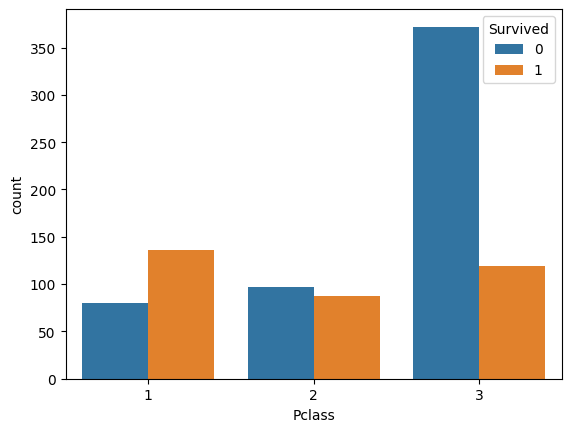

In [11]:
#Посмотрим, влияет ли класс пассажира на уровень смертности
sns.countplot(train_data, x='Pclass', hue='Survived')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


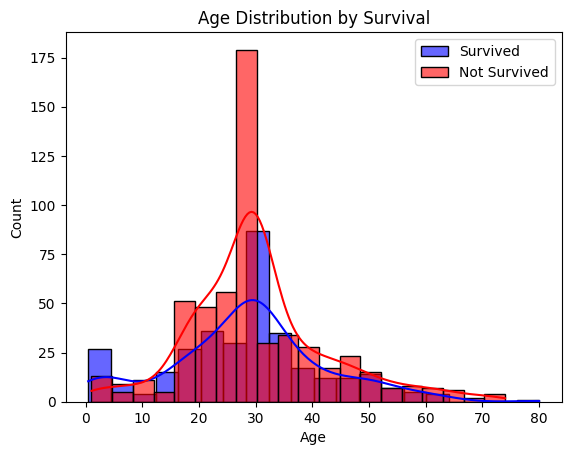

In [13]:
#Имеющиеся данные говорят, что доля выживших заметно выше, среди пассажиров 1 класса. 
# Оценим влияние возраста на выживаемость, но сперва заполним пропуски в данных средним значением.
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
sns.histplot(train_data[train_data["Survived"] == 1]["Age"], label="Survived", kde=True, color="blue", bins=20, alpha=0.6)
sns.histplot(train_data[train_data["Survived"] == 0]["Age"], label="Not Survived", kde=True, color="red", bins=20, alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


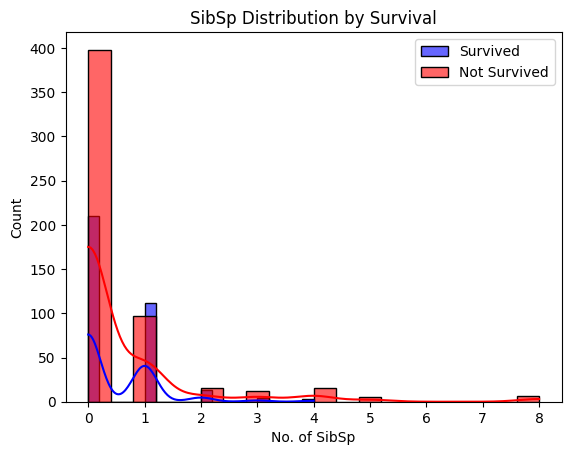

In [14]:
#Оценим есть ли влияние наличия братьев/сестер
train_data["SibSp"].value_counts()
sns.histplot(train_data[train_data["Survived"] == 1]["SibSp"], label="Survived", kde=True, color="blue", bins=20, alpha=0.6)
sns.histplot(train_data[train_data["Survived"] == 0]["SibSp"], label="Not Survived", kde=True, color="red", bins=20, alpha=0.6)
plt.xlabel("No. of SibSp")
plt.ylabel("Count")
plt.title("SibSp Distribution by Survival")
plt.legend()
plt.show()

In [16]:
#Рубрика занимательная статистика 
survival_rate = train_data[train_data['Survived'] == 1]['SibSp'].value_counts()/train_data['SibSp'].value_counts()
survival_rate

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5         NaN
8         NaN
Name: count, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


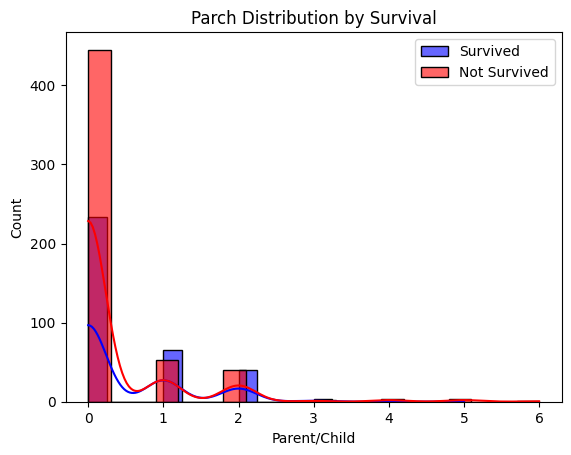

In [17]:
#Родители/дети есть ли зависимость
train_data["Parch"].value_counts()
sns.histplot(train_data[train_data["Survived"] == 1]["Parch"], label="Survived", kde=True, color="blue", bins=20, alpha=0.6)
sns.histplot(train_data[train_data["Survived"] == 0]["Parch"], label="Not Survived", kde=True, color="red", bins=20, alpha=0.6)
plt.xlabel("Parent/Child")
plt.ylabel("Count")
plt.title("Parch Distribution by Survival")
plt.legend()
plt.show()

In [18]:
# Рубрика занимательная статистика
survival_ratio = train_data[train_data['Survived'] == 1]['Parch'].value_counts()/train_data['Parch'].value_counts()
survival_ratio

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4         NaN
5    0.200000
6         NaN
Name: count, dtype: float64

In [19]:
#Закончим семейный вопрос 
survival_rating = train_data[train_data['Survived'] ==1]['Family'].value_counts()/train_data['Family'].value_counts()
survival_rating

Family
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7          NaN
10         NaN
Name: count, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


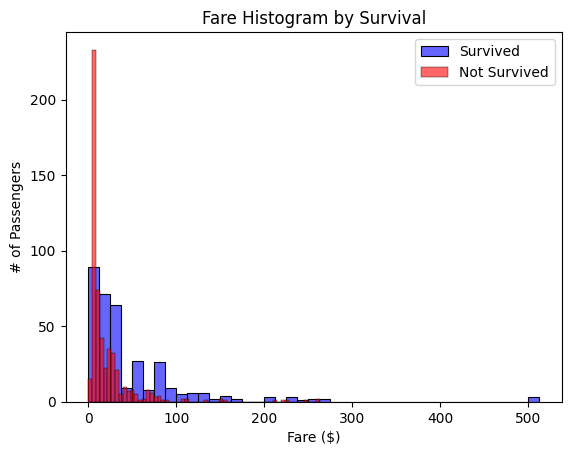

In [23]:
#Цифры говорят сами за себя. Стоп, а цифры вообще умеют разговаривать???
#Ладно, время оценить влияет ли финансовое благополучие пассажиров на выживаемость (хотя мы уже увидели, что да, класс пассажира коррелирует с более высоким шансом выжить)
sns.histplot(train_data[train_data["Survived"] == 1]["Fare"], label="Survived", color="blue",alpha=0.6)
sns.histplot(train_data[train_data["Survived"] == 0]["Fare"], label="Not Survived", color="red",alpha=0.6)
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()
plt.show()